In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

# Import functions Pole, GreatCircle, GeogrToView and Stereonet
import sys, os
sys.path.append(os.path.abspath('../functions'))
from Pole import Pole as Pole
from GreatCircle import GreatCircle
from GeogrToView import GeogrToView
from Stereonet import Stereonet

# new api
from st_coord_line import eq_angle_stereonet
from stereonet_utils import plot_stereonet
from great_circle import great_circle
from pole_utils import trend_plunge_to_strike_dip, strike_dip_to_trend_plunge
from lower_hemisphere import lower_hemisphere
from sph_to_cart import sph_to_cart
from rotation import rotation, rotate_axis, rotation_matrix
from great_circle import great_circle
from geogr_to_view import geogr_to_view

In [2]:
# Read the strike-dip data from the Big Elk anticline
beasd = np.loadtxt(os.path.abspath('../data/ch5-6/beasd.txt'))
beasd = np.radians(beasd)

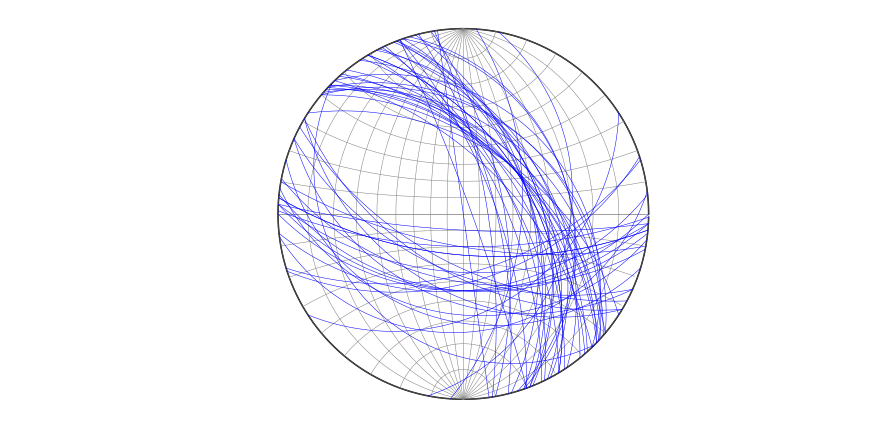

In [3]:
# Old api
# Draw a lower hemisphere equal angle stereonet
trdv, plgv, intrad = np.radians([0, 90, 10]) 
Stereonet(trdv, plgv, intrad, 0)

# Plot the great circles
for i in range(beasd.shape[0]):
    path = GreatCircle(beasd[i,0], beasd[i,1],0)
    plt.plot(path[:,0], path[:,1], 'b', linewidth=0.5)

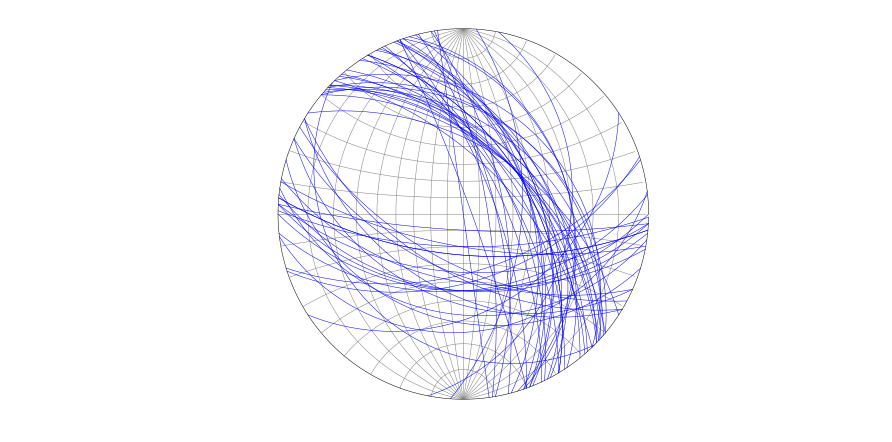

In [4]:
# New api
# Draw a lower hemisphere equal angle stereonet
plot_stereonet(eq_angle_stereonet, np.radians(10))

# Plot the great circles
for i in range(beasd.shape[0]):
    GC_T, GC_P = great_circle(beasd[i,0], beasd[i,1])
    X, Y = eq_angle_stereonet(GC_T, GC_P)
    plt.plot(X, Y, 'b', linewidth=0.5)

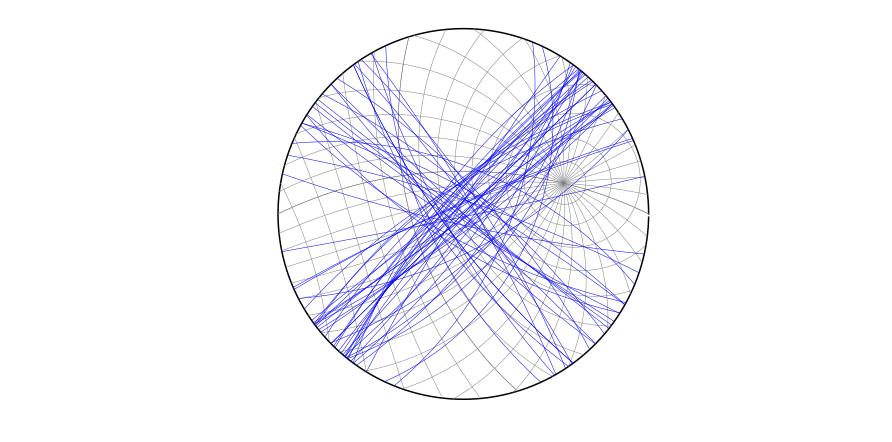

In [5]:
# Old api
# Draw the same data in an equal angle stereonet,
# but make the view direction = fold axis
trdv, plgv = np.radians([125, 26])
Stereonet(trdv, plgv, intrad, 0)

# Plot the great circles
for i in range(beasd.shape[0]):
    # pole to bed
    trdp, plgp =  Pole(beasd[i,0], beasd[i,1], 1)
    # transform pole
    trdpt, plgpt = GeogrToView(trdp,plgp,trdv,plgv)
    # bed from transformed pole
    striket, dipt = Pole(trdpt,plgpt,0)
    # plot great circle
    path = GreatCircle(striket,dipt,0)
    plt.plot(path[:,0], path[:,1], 'b', linewidth=0.5) 

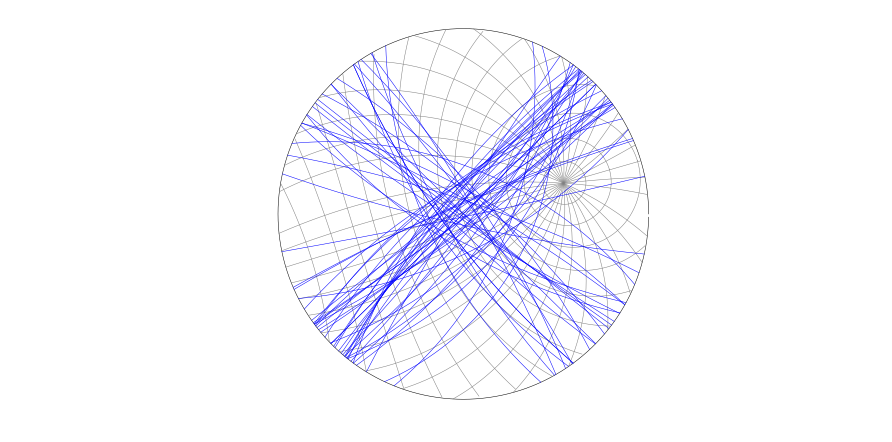

In [6]:
# New api
# Draw the same data in an equal angle stereonet,
# but make the view direction = fold axis
trdv, plgv, intrad = np.radians([125, 26, 10])
plot_stereonet(eq_angle_stereonet, intrad, trdv, plgv)

# Plot the great circles
for i in range(beasd.shape[0]):
    # pole to bed
    trdp, plgp = strike_dip_to_trend_plunge(beasd[i,0], beasd[i,1])
    # transform pole
    trdpt, plgpt = geogr_to_view(trdp, plgp, trdv, plgv)
    # bed from transformed pole
    striket, dipt = trend_plunge_to_strike_dip(trdpt, plgpt)
    # plot great circle
    GC_T, GC_P = great_circle(striket, dipt)
    X, Y = eq_angle_stereonet(GC_T, GC_P)
    plt.plot(X, Y, 'b', linewidth=0.5) 